In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="" 

In [2]:
import tensorflow as tf
import numpy as np
import esc_utils as U

In [3]:
tf.__version__

'1.7.0'

In [4]:
from collections import defaultdict, Counter
import IPython.display as ipd
import matplotlib.pylab as plt


%matplotlib inline

# Investigate ESC data

In [5]:
esc_path = '/workspace/data/ESC/esc10/'

with np.load(esc_path + 'wav16.npz') as esc:
    print(esc.files)
    lens = defaultdict(list)
    mins = defaultdict(list)
    maxs = defaultdict(list)
    
    for fname in esc.files:
        dictdata = esc[fname][()]

        sounds = np.array(dictdata['sounds'])
        labels = np.array(dictdata['labels'])
        print(type(sounds[0][0]), Counter(labels))
        
        lens[fname] = list(map(len, sounds))
        mins[fname] = list(map(min, sounds))        
        maxs[fname] = list(map(max, sounds))        

['fold1', 'fold2', 'fold3', 'fold4', 'fold5']
<class 'numpy.int16'> Counter({0: 8, 1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: 8, 9: 8})
<class 'numpy.int16'> Counter({0: 8, 1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: 8, 9: 8})
<class 'numpy.int16'> Counter({0: 8, 1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: 8, 9: 8})
<class 'numpy.int16'> Counter({0: 8, 1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: 8, 9: 8})
<class 'numpy.int16'> Counter({0: 8, 1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: 8, 9: 8})


In [6]:
for d in [lens, mins, maxs]:
    print(list(map(max, d.values())), list(map(min, d.values())))

[80000, 80000, 80000, 80000, 80000] [26729, 18899, 17785, 13987, 5720]
[-3538, -3644, -4429, -2608, -2548] [-32768, -32768, -32768, -32768, -32768]
[32767, 32767, 32767, 32767, 32767] [4394, 3279, 3635, 3169, 2750]


fold2


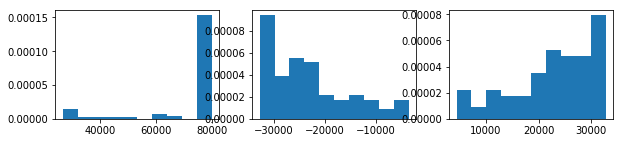

fold3


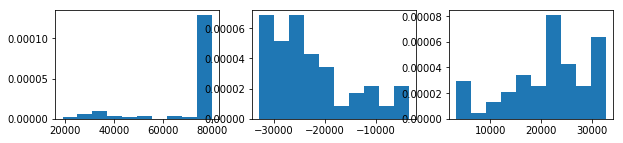

fold5


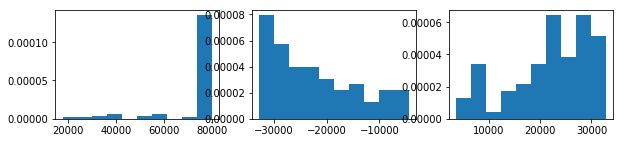

fold4


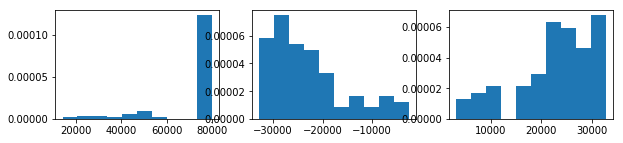

fold1


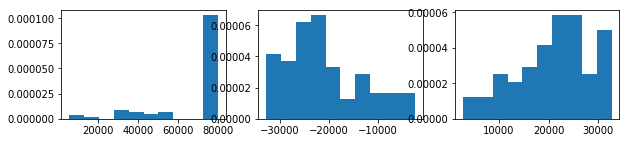

In [7]:
for key in lens.keys():
    print(key)
    _, axs = plt.subplots(1,3, figsize = (10,2))
    axs[0].hist(lens[key], density = True)
    axs[1].hist(mins[key], density = True)
    axs[2].hist(maxs[key], density = True)
    
    plt.show()

In [8]:
N_CLASSES = 10
FS = 16000
INPUT_LENGTH = 40000
SPLIT = 4 # from 1 to 5
IS_TRAINING = True
FACTOR = 32768.0

In [16]:
sound = sounds[-1]

padded = U.padding(INPUT_LENGTH//2)(sound)
cropped = U.random_crop(INPUT_LENGTH)(sound)
normalized = U.normalize(FACTOR)(sound)

print(list(map(len, [sound, padded, cropped, normalized])))

[77647, 117647, 40000, 77647]


In [18]:
print(len(sound))
ipd.Audio(sounds[-1], rate = 16000)

77647


In [19]:
scaled = U.random_scale(0.8, 'Nearest')(sounds[-1])
print(len(scaled))
ipd.Audio(scaled, rate = 16000)

71141


In [20]:
sounds[-1]

array([ -7, -19, -19, ...,   0,   0,   1], dtype=int16)

In [20]:
gained = U.random_gain(6)(sounds[-1])
ipd.Audio(gained, rate = 16000)

In [116]:
ipd.Audio(sounds[-1]*np.power(10, 1000/ 20.0), rate = 16000)